# Method -1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("C:/Users/Navya/Desktop/Project Isro/datasheet1.xlsx")
data

,T,M,H
0,30,71,98
1,33,72,98
2,30,71,98
3,30,71,99
4,30,75,98
...,...,...,...
106742,24,17,8
106743,24,17,12
106744,24,17,12
106745,24,17,14


In [3]:
data[data["H"]>=5]

,T,M,H
0,30,71,98
1,33,72,98
2,30,71,98
3,30,71,99
4,30,75,98
...,...,...,...
106742,24,17,8
106743,24,17,12
106744,24,17,12
106745,24,17,14


In [4]:
#defining humidity zones according to the ranges of humidity
data['zone'] = ""
data.loc[data.H < 20, 'zone'] = 'arid'
data.loc[(data.H>=20) & (data.H<50), 'zone'] = 'semi arid'
data.loc[(data.H >=50) & (data.H<75), 'zone'] = 'sub humid'
data.loc[data.H >=75, 'zone'] = 'humid'

In [5]:
data["ETo"]=""
data["zone"] = data["zone"].astype(str)
data["T"] = data["T"].astype(int)

In [6]:
# defining the absolute evapotranspiration value(Eto) using the humidity zones and temperature readings
data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

In [7]:
data

,T,M,H,zone,ETo
0,30,71,98,humid,5.5
1,33,72,98,humid,5.5
2,30,71,98,humid,5.5
3,30,71,99,humid,5.5
4,30,75,98,humid,5.5
...,...,...,...,...,...
106742,24,17,8,arid,7.5
106743,24,17,12,arid,7.5
106744,24,17,12,arid,7.5
106745,24,17,14,arid,7.5


## Psuedocode
1. Select that part of dataset which pertains to the zone in which the crop is grown
2. Multiply the Eto with the crop factor (Kc) for the 4 periods of growth ( Initial,Crop Developement, Mid-season, Harvest) considered.
3. We have 4 values of Kc,one for each period of growth. Hence, we get 4 values of potential crop evapotranspiration (Etc); one for each period of growth
4. Find the mean of soil moisture so that it can be used for thr difference in soil moisture in each reading
5. Follow the formula: Water reqd = Potential crop evapotranspiration - difference in soil moisture - precipitation
6. Considering precipitation to be 0, (to calculate max reqd water), we get, water reqd = Etc - delta(SM)
7. This formula is applied individually to all 4 periods of crop development to get the water required in each period
8. The total water requirement is the sum of the these 4 requirements.

## Crop coefficient values for the crops considered:

Kc values at :  Initial | Crop development | Mid-season | Harvest stages\
Cotton - Humid\
Kc  :  0.45 0.75 1.15 0.75

Sugarcane - Humid\
Kc :  0.45 0.85 1.15 0.65

Maize - Arid\
Kc :  0.40 0.75 1.15 0.70

Millet/Sorghum - Arid\
Kc : 0.35 0.75 1.10 0.65

## Analysis of Cotton Crop

In [8]:
#defining crop potentials for all 4 growth periods
d_cotton = data[data["zone"]=="humid"]
d_cotton["ETc1"] = d_cotton["ETo"]*0.45
d_cotton["ETc2"] = d_cotton["ETo"]*0.75
d_cotton["ETc3"] = d_cotton["ETo"]*1.15
d_cotton["ETc4"] = d_cotton["ETo"]*0.75

<ipython-input-8-2bc12c678316>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["ETc1"] = d_cotton["ETo"]*0.45
<ipython-input-8-2bc12c678316>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["ETc2"] = d_cotton["ETo"]*0.75
<ipython-input-8-2bc12c678316>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [9]:
#finding mean of soil moisture coloumn
avg = d_cotton["M"].mean()

#calculating water reqd for each of the 4 periods
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

<ipython-input-9-8761d682dd97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
<ipython-input-9-8761d682dd97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
<ipython-input-9-8761d682dd97>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [10]:
d_cotton

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water-initial,water-development,water-midseason,water-harvest
0,30,71,98,humid,5.5,2.475,4.125,6.325,4.125,2.3924,4.0424,6.2424,4.0424
1,33,72,98,humid,5.5,2.475,4.125,6.325,4.125,2.4024,4.0524,6.2524,4.0524
2,30,71,98,humid,5.5,2.475,4.125,6.325,4.125,2.3924,4.0424,6.2424,4.0424
3,30,71,99,humid,5.5,2.475,4.125,6.325,4.125,2.3924,4.0424,6.2424,4.0424
4,30,75,98,humid,5.5,2.475,4.125,6.325,4.125,2.4324,4.0824,6.2824,4.0824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72553,28,71,81,humid,5.5,2.475,4.125,6.325,4.125,2.3924,4.0424,6.2424,4.0424
72565,28,71,80,humid,5.5,2.475,4.125,6.325,4.125,2.3924,4.0424,6.2424,4.0424
72578,28,71,78,humid,5.5,2.475,4.125,6.325,4.125,2.3924,4.0424,6.2424,4.0424
72596,28,70,80,humid,5.5,2.475,4.125,6.325,4.125,2.3824,4.0324,6.2324,4.0324


<BarContainer object of 4 artists>

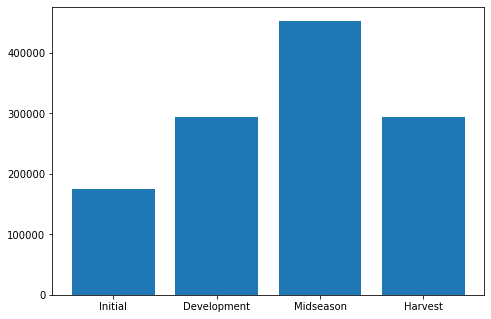

In [11]:
#plotting the water reqd for each growth period
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)

### A similar analysis is done for Maize, Millet and Sugarcane

## Analysis of Millet Crop

In [12]:
d_millet = data[data["zone"]=="arid"]
d_millet["ETc1"] = d_millet["ETo"]*0.35
d_millet["ETc2"] = d_millet["ETo"]*0.75
d_millet["ETc3"] = d_millet["ETo"]*1.10
d_millet["ETc4"] = d_millet["ETo"]*0.65

<ipython-input-12-42b0a20af12d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_millet["ETc1"] = d_millet["ETo"]*0.35
<ipython-input-12-42b0a20af12d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_millet["ETc2"] = d_millet["ETo"]*0.75
<ipython-input-12-42b0a20af12d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [13]:
avg = d_millet["M"].mean()
d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-midseason"] = d_millet["ETc3"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)

<ipython-input-13-2ba8b94d9e74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
<ipython-input-13-2ba8b94d9e74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
<ipython-input-13-2ba8b94d9e74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [14]:
d_millet

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water-initial,water-development,water-midseason,water-harvest
414,30,75,4,arid,9.5,3.325,7.125,10.45,6.175,2.87891,6.67891,10.0039,5.72891
415,30,77,4,arid,9.5,3.325,7.125,10.45,6.175,2.85891,6.65891,9.98391,5.70891
416,30,75,12,arid,9.5,3.325,7.125,10.45,6.175,2.87891,6.67891,10.0039,5.72891
417,31,73,4,arid,9.5,3.325,7.125,10.45,6.175,2.89891,6.69891,10.0239,5.74891
418,30,78,12,arid,9.5,3.325,7.125,10.45,6.175,2.84891,6.64891,9.97391,5.69891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109
106743,24,17,12,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109
106744,24,17,12,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109
106745,24,17,14,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109


<BarContainer object of 4 artists>

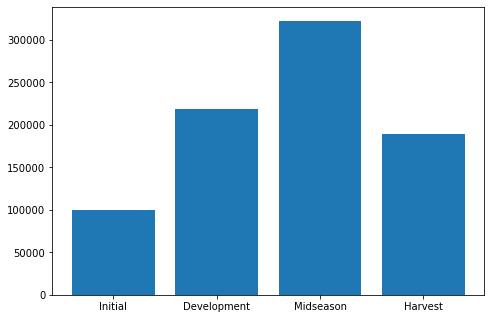

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_millet["water-initial"].sum(),d_millet["water-development"].sum(),d_millet["water-midseason"].sum(), d_millet["water-harvest"].sum()]
ax.bar(season,amt)

## Analysis of Maize crop

In [16]:
d_maize = data[data["zone"]=="arid"]
d_maize["ETc1"] = d_maize["ETo"]*0.40
d_maize["ETc2"] = d_maize["ETo"]*0.75
d_maize["ETc3"] = d_maize["ETo"]*1.15
d_maize["ETc4"] = d_maize["ETo"]*0.70

<ipython-input-16-756556ff6deb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_maize["ETc1"] = d_maize["ETo"]*0.40
<ipython-input-16-756556ff6deb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_maize["ETc2"] = d_maize["ETo"]*0.75
<ipython-input-16-756556ff6deb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [17]:
avg = d_maize["M"].mean()
d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-midseason"] = d_maize["ETc3"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-harvest"] = d_maize["ETc4"] - (abs(d_maize["M"]-avg)/100)

<ipython-input-17-efc5891dc957>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
<ipython-input-17-efc5891dc957>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
<ipython-input-17-efc5891dc957>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [18]:
d_maize

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water-initial,water-development,water-midseason,water-harvest
414,30,75,4,arid,9.5,3.8,7.125,10.925,6.65,3.35391,6.67891,10.4789,6.20391
415,30,77,4,arid,9.5,3.8,7.125,10.925,6.65,3.33391,6.65891,10.4589,6.18391
416,30,75,12,arid,9.5,3.8,7.125,10.925,6.65,3.35391,6.67891,10.4789,6.20391
417,31,73,4,arid,9.5,3.8,7.125,10.925,6.65,3.37391,6.69891,10.4989,6.22391
418,30,78,12,arid,9.5,3.8,7.125,10.925,6.65,3.32391,6.64891,10.4489,6.17391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,7.5,3,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609
106743,24,17,12,arid,7.5,3,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609
106744,24,17,12,arid,7.5,3,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609
106745,24,17,14,arid,7.5,3,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609


<BarContainer object of 4 artists>

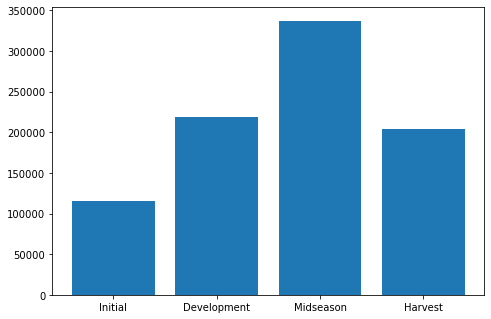

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_maize["water-initial"].sum(),d_maize["water-development"].sum(),d_maize["water-midseason"].sum(), d_maize["water-harvest"].sum()]
ax.bar(season,amt)

# Analysis of sugarcane crop

In [20]:
d_sc = data[data["zone"]=="humid"]
d_sc["ETc1"] = d_sc["ETo"]*0.45
d_sc["ETc2"] = d_sc["ETo"]*0.85
d_sc["ETc3"] = d_sc["ETo"]*1.15
d_sc["ETc4"] = d_sc["ETo"]*0.65


avg = d_sc["M"].mean()
d_sc["water-initial"] = d_sc["ETc1"]-(abs(d_sc["M"]-avg)/100)
d_sc["water-development"] = d_sc["ETc2"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-midseason"] = d_sc["ETc3"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-harvest"] = d_sc["ETc4"] - (abs(d_sc["M"]-avg)/100)

<ipython-input-20-6093955a4dea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sc["ETc1"] = d_sc["ETo"]*0.45
<ipython-input-20-6093955a4dea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sc["ETc2"] = d_sc["ETo"]*0.85
<ipython-input-20-6093955a4dea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

<BarContainer object of 4 artists>

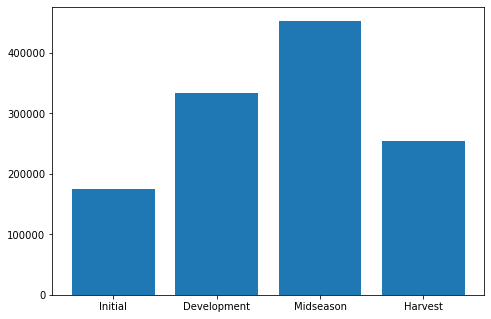

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_sc["water-initial"].sum(),d_sc["water-development"].sum(),d_sc["water-midseason"].sum(), d_sc["water-harvest"].sum()]
ax.bar(season,amt)

# Comparison of irrigation requirement of all the above crops

In [22]:
# finding total water reqd as sum of the waters in each growth period
total_cotton=d_cotton["water-initial"].sum()+d_cotton["water-development"].sum()+d_cotton["water-midseason"].sum()+ d_cotton["water-harvest"].sum()
total_maize=d_maize["water-initial"].sum()+d_maize["water-development"].sum()+d_maize["water-midseason"].sum()+ d_maize["water-harvest"].sum()
total_millet=d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()
total_sc=d_sc["water-initial"].sum()+d_sc["water-development"].sum()+d_sc["water-midseason"].sum()+ d_sc["water-harvest"].sum()

<BarContainer object of 4 artists>

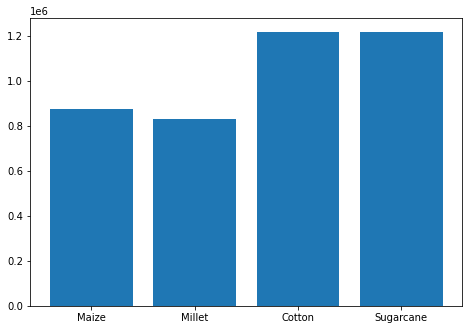

In [23]:
#comparison plot for total water reqd for 4 different crops
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = ['Maize', 'Millet','Cotton','Sugarcane']
amt = [total_maize,total_millet,total_cotton,total_sc]
ax.bar(crop,amt)

In [24]:
amt

[875081.5544217324, 830563.8044217755, 1218084.7981786898, 1218084.7981786374]

# Repeating data - 5 times

In [25]:
data_new = data.copy()

In [26]:
frames = [data_new,data_new,data_new,data_new,data_new]
newdat = pd.concat(frames)

In [27]:
newdat['zone'] = ""
newdat.loc[newdat.H < 20, 'zone'] = 'arid'
newdat.loc[(newdat.H>=20) & (newdat.H<50), 'zone'] = 'semi arid'
newdat.loc[(newdat.H >=50) & (newdat.H<75), 'zone'] = 'sub humid'
newdat.loc[newdat.H >=75, 'zone'] = 'humid'

In [28]:
newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="humid") , "ETo"] = 3.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="humid"), "ETo"] = 5.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="sub humid"), "ETo"] = 5.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="sub humid"), "ETo"] = 7.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="semi arid"), "ETo"] = 6.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="semi arid"), "ETo"] = 8.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="arid"), "ETo"] = 7.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="arid"), "ETo"] = 9.5

<ipython-input-29-412809ceccf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["ETc1"] = d_cotton["ETo"]*0.45
<ipython-input-29-412809ceccf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["ETc2"] = d_cotton["ETo"]*0.75
<ipython-input-29-412809ceccf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

<ipython-input-29-412809ceccf6>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sc["ETc1"] = d_sc["ETo"]*0.45
<ipython-input-29-412809ceccf6>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sc["ETc2"] = d_sc["ETo"]*0.85
<ipython-input-29-412809ceccf6>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<BarContainer object of 4 artists>

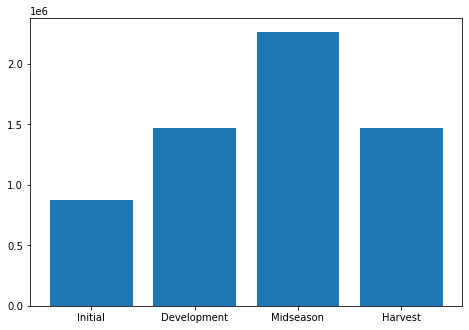

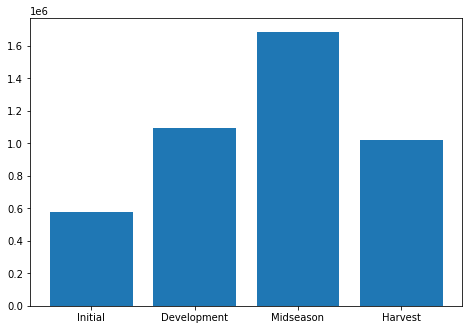

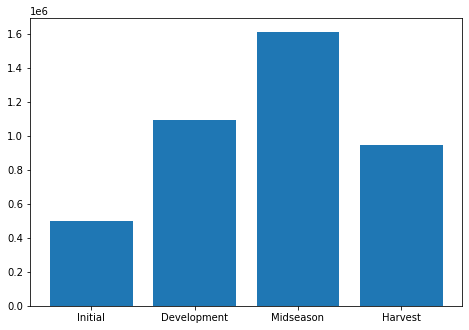

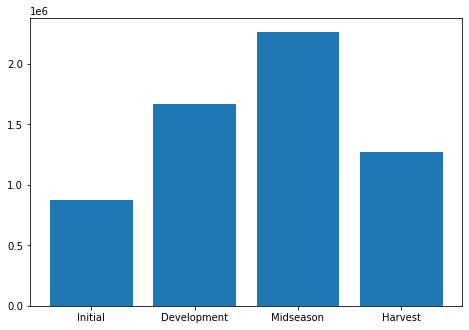

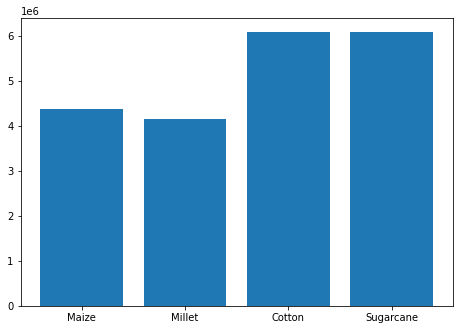

In [29]:
d_cotton = newdat[newdat["zone"]=="humid"]
d_cotton["ETc1"] = d_cotton["ETo"]*0.45
d_cotton["ETc2"] = d_cotton["ETo"]*0.75
d_cotton["ETc3"] = d_cotton["ETo"]*1.15
d_cotton["ETc4"] = d_cotton["ETo"]*0.75

avg = d_cotton["M"].mean()
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)



d_maize = newdat[newdat["zone"]=="arid"]
d_maize["ETc1"] = d_maize["ETo"]*0.40
d_maize["ETc2"] = d_maize["ETo"]*0.75
d_maize["ETc3"] = d_maize["ETo"]*1.15
d_maize["ETc4"] = d_maize["ETo"]*0.70
avg = d_maize["M"].mean()
d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-midseason"] = d_maize["ETc3"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-harvest"] = d_maize["ETc4"] - (abs(d_maize["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_maize["water-initial"].sum(),d_maize["water-development"].sum(),d_maize["water-midseason"].sum(), d_maize["water-harvest"].sum()]
ax.bar(season,amt)




d_millet = newdat[newdat["zone"]=="arid"]
d_millet["ETc1"] = d_millet["ETo"]*0.35
d_millet["ETc2"] = d_millet["ETo"]*0.75
d_millet["ETc3"] = d_millet["ETo"]*1.10
d_millet["ETc4"] = d_millet["ETo"]*0.65
avg = d_millet["M"].mean()
d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-midseason"] = d_millet["ETc3"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_millet["water-initial"].sum(),d_millet["water-development"].sum(),d_millet["water-midseason"].sum(), d_millet["water-harvest"].sum()]
ax.bar(season,amt)



d_sc = newdat[newdat["zone"]=="humid"]
d_sc["ETc1"] = d_sc["ETo"]*0.45
d_sc["ETc2"] = d_sc["ETo"]*0.85
d_sc["ETc3"] = d_sc["ETo"]*1.15
d_sc["ETc4"] = d_sc["ETo"]*0.65

avg = d_sc["M"].mean()
d_sc["water-initial"] = d_sc["ETc1"]-(abs(d_sc["M"]-avg)/100)
d_sc["water-development"] = d_sc["ETc2"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-midseason"] = d_sc["ETc3"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-harvest"] = d_sc["ETc4"] - (abs(d_sc["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_sc["water-initial"].sum(),d_sc["water-development"].sum(),d_sc["water-midseason"].sum(), d_sc["water-harvest"].sum()]
ax.bar(season,amt)




total_cotton=d_cotton["water-initial"].sum()+d_cotton["water-development"].sum()+d_cotton["water-midseason"].sum()+ d_cotton["water-harvest"].sum()
total_maize=d_maize["water-initial"].sum()+d_maize["water-development"].sum()+d_maize["water-midseason"].sum()+ d_maize["water-harvest"].sum()
total_millet=d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()
total_sc=d_sc["water-initial"].sum()+d_sc["water-development"].sum()+d_sc["water-midseason"].sum()+ d_sc["water-harvest"].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = ['Maize', 'Millet','Cotton','Sugarcane']
amt = [total_maize,total_millet,total_cotton,total_sc]
ax.bar(crop,amt)

In [30]:
amt

[4375407.772110611, 4152819.02210788, 6090423.990908051, 6090423.990897373]

# Repeating data - 10 times

In [31]:
frames = [data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new]
newdat = pd.concat(frames)

In [32]:
newdat['zone'] = ""
newdat.loc[newdat.H < 20, 'zone'] = 'arid'
newdat.loc[(newdat.H>=20) & (newdat.H<50), 'zone'] = 'semi arid'
newdat.loc[(newdat.H >=50) & (newdat.H<75), 'zone'] = 'sub humid'
newdat.loc[newdat.H >=75, 'zone'] = 'humid'

In [33]:
newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="humid") , "ETo"] = 3.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="humid"), "ETo"] = 5.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="sub humid"), "ETo"] = 5.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="sub humid"), "ETo"] = 7.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="semi arid"), "ETo"] = 6.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="semi arid"), "ETo"] = 8.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="arid"), "ETo"] = 7.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="arid"), "ETo"] = 9.5

<ipython-input-34-412809ceccf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["ETc1"] = d_cotton["ETo"]*0.45
<ipython-input-34-412809ceccf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["ETc2"] = d_cotton["ETo"]*0.75
<ipython-input-34-412809ceccf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

<ipython-input-34-412809ceccf6>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sc["ETc1"] = d_sc["ETo"]*0.45
<ipython-input-34-412809ceccf6>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sc["ETc2"] = d_sc["ETo"]*0.85
<ipython-input-34-412809ceccf6>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<BarContainer object of 4 artists>

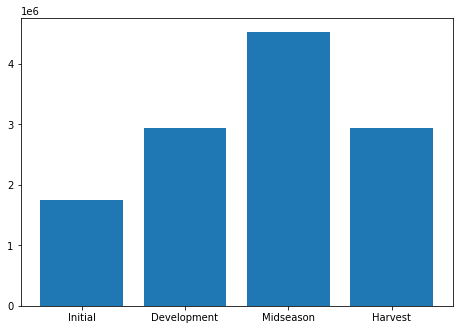

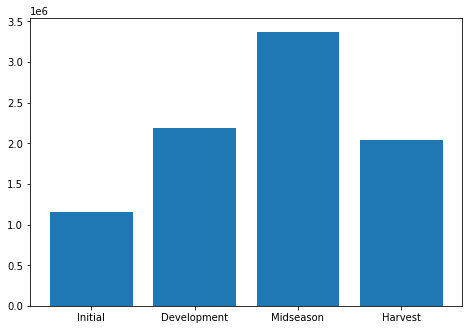

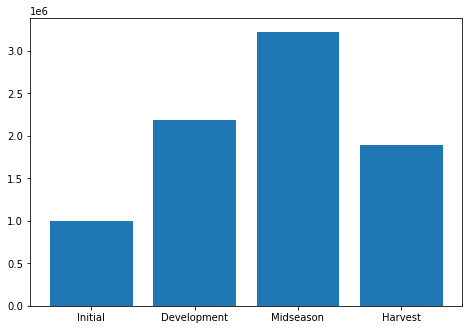

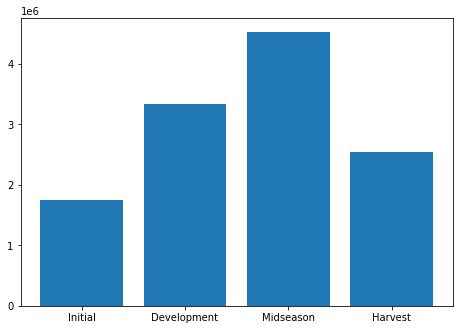

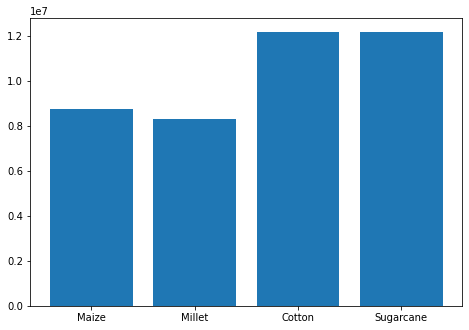

In [34]:
d_cotton = newdat[newdat["zone"]=="humid"]
d_cotton["ETc1"] = d_cotton["ETo"]*0.45
d_cotton["ETc2"] = d_cotton["ETo"]*0.75
d_cotton["ETc3"] = d_cotton["ETo"]*1.15
d_cotton["ETc4"] = d_cotton["ETo"]*0.75

avg = d_cotton["M"].mean()
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)



d_maize = newdat[newdat["zone"]=="arid"]
d_maize["ETc1"] = d_maize["ETo"]*0.40
d_maize["ETc2"] = d_maize["ETo"]*0.75
d_maize["ETc3"] = d_maize["ETo"]*1.15
d_maize["ETc4"] = d_maize["ETo"]*0.70
avg = d_maize["M"].mean()
d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-midseason"] = d_maize["ETc3"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-harvest"] = d_maize["ETc4"] - (abs(d_maize["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_maize["water-initial"].sum(),d_maize["water-development"].sum(),d_maize["water-midseason"].sum(), d_maize["water-harvest"].sum()]
ax.bar(season,amt)




d_millet = newdat[newdat["zone"]=="arid"]
d_millet["ETc1"] = d_millet["ETo"]*0.35
d_millet["ETc2"] = d_millet["ETo"]*0.75
d_millet["ETc3"] = d_millet["ETo"]*1.10
d_millet["ETc4"] = d_millet["ETo"]*0.65
avg = d_millet["M"].mean()
d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-midseason"] = d_millet["ETc3"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_millet["water-initial"].sum(),d_millet["water-development"].sum(),d_millet["water-midseason"].sum(), d_millet["water-harvest"].sum()]
ax.bar(season,amt)



d_sc = newdat[newdat["zone"]=="humid"]
d_sc["ETc1"] = d_sc["ETo"]*0.45
d_sc["ETc2"] = d_sc["ETo"]*0.85
d_sc["ETc3"] = d_sc["ETo"]*1.15
d_sc["ETc4"] = d_sc["ETo"]*0.65

avg = d_sc["M"].mean()
d_sc["water-initial"] = d_sc["ETc1"]-(abs(d_sc["M"]-avg)/100)
d_sc["water-development"] = d_sc["ETc2"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-midseason"] = d_sc["ETc3"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-harvest"] = d_sc["ETc4"] - (abs(d_sc["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_sc["water-initial"].sum(),d_sc["water-development"].sum(),d_sc["water-midseason"].sum(), d_sc["water-harvest"].sum()]
ax.bar(season,amt)




total_cotton=d_cotton["water-initial"].sum()+d_cotton["water-development"].sum()+d_cotton["water-midseason"].sum()+ d_cotton["water-harvest"].sum()
total_maize=d_maize["water-initial"].sum()+d_maize["water-development"].sum()+d_maize["water-midseason"].sum()+ d_maize["water-harvest"].sum()
total_millet=d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()
total_sc=d_sc["water-initial"].sum()+d_sc["water-development"].sum()+d_sc["water-midseason"].sum()+ d_sc["water-harvest"].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = ['Maize', 'Millet','Cotton','Sugarcane']
amt = [total_maize,total_millet,total_cotton,total_sc]
ax.bar(crop,amt)

In [35]:
amt

[8750815.544213196, 8305638.044223302, 12180847.981780164, 12180847.981758816]

# Repeating data - 15 times

<ipython-input-36-d544572cfd3c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["ETc1"] = d_cotton["ETo"]*0.45
<ipython-input-36-d544572cfd3c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cotton["ETc2"] = d_cotton["ETo"]*0.75
<ipython-input-36-d544572cfd3c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

<ipython-input-36-d544572cfd3c>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)
<ipython-input-36-d544572cfd3c>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sc["ETc1"] = d_sc["ETo"]*0.45
<ipython-input-36-d544572cfd3c>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

<BarContainer object of 4 artists>

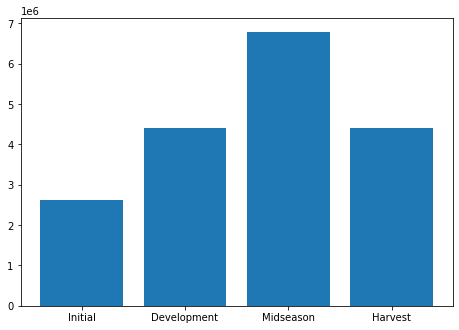

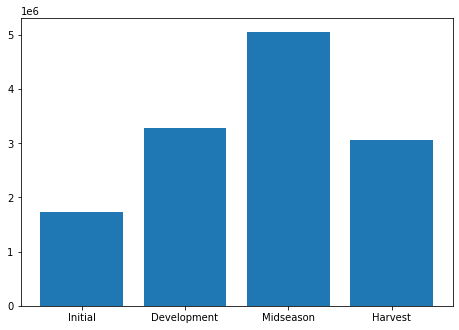

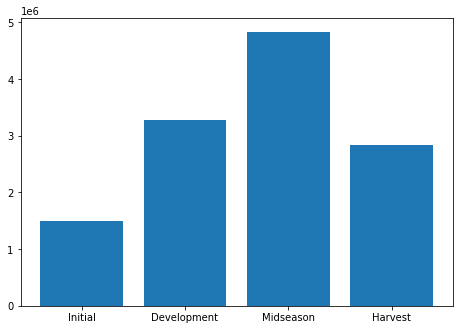

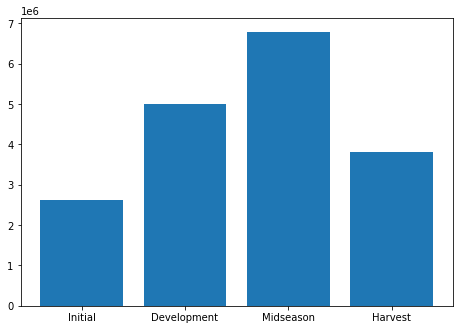

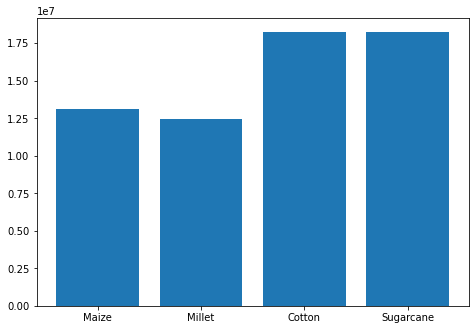

In [36]:
frames = [data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new]
newdat = pd.concat(frames)

newdat['zone'] = ""
newdat.loc[newdat.H < 20, 'zone'] = 'arid'
newdat.loc[(newdat.H>=20) & (newdat.H<50), 'zone'] = 'semi arid'
newdat.loc[(newdat.H >=50) & (newdat.H<75), 'zone'] = 'sub humid'
newdat.loc[newdat.H >=75, 'zone'] = 'humid'

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="humid") , "ETo"] = 3.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="humid"), "ETo"] = 5.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="sub humid"), "ETo"] = 5.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="sub humid"), "ETo"] = 7.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="semi arid"), "ETo"] = 6.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="semi arid"), "ETo"] = 8.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="arid"), "ETo"] = 7.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="arid"), "ETo"] = 9.5

d_cotton = newdat[newdat["zone"]=="humid"]
d_cotton["ETc1"] = d_cotton["ETo"]*0.45
d_cotton["ETc2"] = d_cotton["ETo"]*0.75
d_cotton["ETc3"] = d_cotton["ETo"]*1.15
d_cotton["ETc4"] = d_cotton["ETo"]*0.75

avg = d_cotton["M"].mean()
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)



d_maize = newdat[newdat["zone"]=="arid"]
d_maize["ETc1"] = d_maize["ETo"]*0.40
d_maize["ETc2"] = d_maize["ETo"]*0.75
d_maize["ETc3"] = d_maize["ETo"]*1.15
d_maize["ETc4"] = d_maize["ETo"]*0.70
avg = d_maize["M"].mean()
d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-midseason"] = d_maize["ETc3"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-harvest"] = d_maize["ETc4"] - (abs(d_maize["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_maize["water-initial"].sum(),d_maize["water-development"].sum(),d_maize["water-midseason"].sum(), d_maize["water-harvest"].sum()]
ax.bar(season,amt)




d_millet = newdat[newdat["zone"]=="arid"]
d_millet["ETc1"] = d_millet["ETo"]*0.35
d_millet["ETc2"] = d_millet["ETo"]*0.75
d_millet["ETc3"] = d_millet["ETo"]*1.10
d_millet["ETc4"] = d_millet["ETo"]*0.65
avg = d_millet["M"].mean()
d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-midseason"] = d_millet["ETc3"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_millet["water-initial"].sum(),d_millet["water-development"].sum(),d_millet["water-midseason"].sum(), d_millet["water-harvest"].sum()]
ax.bar(season,amt)



d_sc = newdat[newdat["zone"]=="humid"]
d_sc["ETc1"] = d_sc["ETo"]*0.45
d_sc["ETc2"] = d_sc["ETo"]*0.85
d_sc["ETc3"] = d_sc["ETo"]*1.15
d_sc["ETc4"] = d_sc["ETo"]*0.65

avg = d_sc["M"].mean()
d_sc["water-initial"] = d_sc["ETc1"]-(abs(d_sc["M"]-avg)/100)
d_sc["water-development"] = d_sc["ETc2"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-midseason"] = d_sc["ETc3"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-harvest"] = d_sc["ETc4"] - (abs(d_sc["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_sc["water-initial"].sum(),d_sc["water-development"].sum(),d_sc["water-midseason"].sum(), d_sc["water-harvest"].sum()]
ax.bar(season,amt)




total_cotton=d_cotton["water-initial"].sum()+d_cotton["water-development"].sum()+d_cotton["water-midseason"].sum()+ d_cotton["water-harvest"].sum()
total_maize=d_maize["water-initial"].sum()+d_maize["water-development"].sum()+d_maize["water-midseason"].sum()+ d_maize["water-harvest"].sum()
total_millet=d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()
total_sc=d_sc["water-initial"].sum()+d_sc["water-development"].sum()+d_sc["water-midseason"].sum()+ d_sc["water-harvest"].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = ['Maize', 'Millet','Cotton','Sugarcane']
amt = [total_maize,total_millet,total_cotton,total_sc]
ax.bar(crop,amt)

In [37]:
amt

[13126223.316326585, 12458457.06633344, 18271271.972642615, 18271271.97261758]